In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
link = 'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv'
data = pd.read_csv(link, error_bad_lines=False)
data.head(10)

C:\Users\Павел\AppData\Local\Temp\ipykernel_19732\2074657973.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(link, error_bad_lines=False)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


68.4516779490134 71.96817420435511
T-статистика: 8.08698828481822
P-значение: 5.905856541602205e-16
Различие статистически значимо: спортивные игры получают высшие оценки критиков.


C:\Users\Павел\AppData\Local\Temp\ipykernel_19732\186357310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_games.dropna(subset=['Critic_Score'], inplace=True)
C:\Users\Павел\AppData\Local\Temp\ipykernel_19732\186357310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_games.dropna(subset=['Critic_Score'], inplace=True)


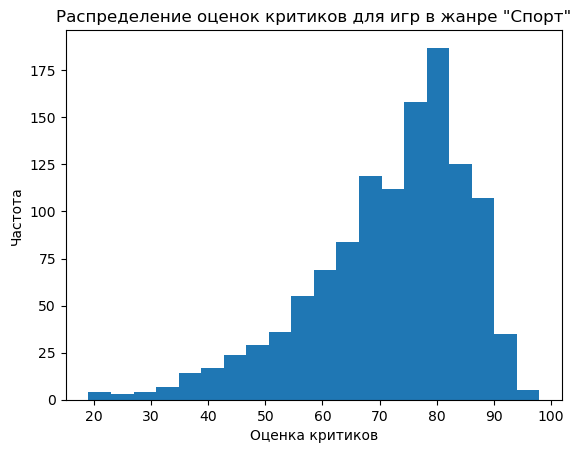

0.1303172332845207


In [3]:
sports_games = data[data['Genre'] == 'Sports']
other_games = data[data['Genre'] != 'Sports']
average_critic_score_sports = sports_games['Critic_Score'].mean()
average_critic_score = other_games['Critic_Score'].mean()
print(average_critic_score, average_critic_score_sports)
#Исходя из значений можно сказать что среднее значение оценок спортивных игр чуть выше чем других.
#Можно попробовать доказать это статистически можно использовать t-тест. Однако в данных есть пропуски и достаточно большое количество. Предлогаю убрать их для расчета. 
sports_games.dropna(subset=['Critic_Score'], inplace=True)
other_games.dropna(subset=['Critic_Score'], inplace=True)
t_statistic, p_value = stats.ttest_ind(sports_games['Critic_Score'], other_games['Critic_Score'], alternative='greater', equal_var=False)
print("T-статистика:", t_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print("Различие статистически значимо: спортивные игры получают высшие оценки критиков.")
else:
    print("Различие не статистически значимо: оценки критиков для спортивных игр и игр других жанров схожи.")
#Таким образом, можно сделать вывод, что критики, скорее всего, относятся более высоко к спортивным играм по сравнению с играми других жанров.
#Можно построить гистограмму, чтобы наглядно посмотреть распределение оценок
plt.hist(sports_games['Critic_Score'], bins=20)
plt.xlabel('Оценка критиков')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков для игр в жанре "Спорт"')
plt.show()
#А также можно посмотреть корреляцию оценок и продажь
correlation = sports_games['Critic_Score'].corr(sports_games['Global_Sales'])
print(correlation)
#Корреляциия имеет достаточно маленькое значение а значит она не очень сильная, и другие факторы также оказывают влияние на оценки пользователей

In [40]:
pc_critic_scores = data[data['Platform'] == 'PC']['Critic_Score']
ps4_critic_scores = data[data['Platform'] == 'PS4']['Critic_Score']
#Уберем пропуски
pc_critic_scores = pc_critic_scores.dropna()
ps4_critic_scores = ps4_critic_scores.dropna()
#Сравним средние значения оценок
mean_critic_score_pc = pc_critic_scores.mean()
mean_critic_score_ps4 = ps4_critic_scores.mean()
print("Средняя оценка критиков для игр на PC:", mean_critic_score_pc)
print("Средняя оценка критиков для игр на PS4:", mean_critic_score_ps4)
# Проводим двухвыборочный t-тест
t_statistic, p_value = stats.ttest_ind(pc_critic_scores, ps4_critic_scores, alternative='greater', equal_var=False)
print("T-статистика:", t_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Средние оценки критиков различаются. Игры на PC оценивают выше. ")
else:
    print("Не отвергаем нулевую гипотезу. Средние оценки критиков равны.")
#Различия не случайны. Следовательно, можно утверждать, что критики относятся к играм на PC и PS4 по-разному, и оценки отличаются статистически значимо.

Средняя оценка критиков для игр на PC: 75.92867132867133
Средняя оценка критиков для игр на PS4: 72.09126984126983
T-статистика: 4.3087588262138725
P-значение: 1.033624578641739e-05
Отвергаем нулевую гипотезу. Средние оценки критиков различаются.


In [5]:
critic_scores_shooter = data[data['Genre'] == 'Shooter']['Critic_Score'].dropna()
critic_scores_strategy = data[data['Genre'] == 'Strategy']['Critic_Score'].dropna()
average_critic_score_strategy = critic_scores_strategy.mean()
average_critic_score_shooter = critic_scores_shooter.mean()
print("Средняя оценка критиков для жанра 'Strategy':", average_critic_score_strategy)
print("Средняя оценка критиков для жанра 'Shooter':", average_critic_score_shooter)
t_statistic, p_value = stats.ttest_ind(critic_scores_shooter, critic_scores_strategy)
print("T-статистика:", t_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Средние оценки критиков для стрелялок и стратегий различаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние оценки критиков для стрелялок и стратегий равны.")
#Это означает, что различие оценок между жанрами "стрелялки" и "стратегии" статистически значимо, и оценки для жанра "стратегия" выше.


Средняя оценка критиков для жанра 'Strategy': 72.08609271523179
Средняя оценка критиков для жанра 'Shooter': 70.18114406779661
T-статистика: -2.06670263948504
P-значение: 0.03896871303135602
Отвергаем нулевую гипотезу. Средние оценки критиков для стрелялок и стратегий различаются.


Задание 2

In [6]:
link = 'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv'
df = pd.read_csv(link, error_bad_lines=False)
df.head(10)

C:\Users\Павел\AppData\Local\Temp\ipykernel_19732\1033999441.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(link, error_bad_lines=False)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df['Message'] = df['Message'].str.lower()
def remove_special_characters(text):
    # Используем регулярное выражение для удаления всего, кроме букв и цифр
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
df['Message'] = df['Message'].apply(remove_special_characters)
df['Message']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()  # Разбить текст на слова
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)
df['Message'] = df['Message'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [6]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()  # Разбить текст на слова
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df['Message'] = df['Message'].apply(lemmatize_text)
df

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Message'])
X = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9515550239234449
Confusion Matrix:
 [[1444    4]
 [  77  147]]


Верхний левый элемент (1444) представляет количество истинно негативных (не спам) сообщений, которые модель правильно классифицировала как не спам.
Верхний правый элемент (4) представляет количество истинно положительных (спам) сообщений, которые модель неправильно классифицировала как не спам.
Нижний левый элемент (77) представляет количество ложно отрицательных (не спам) сообщений, которые модель неправильно классифицировала как спам.
Нижний правый элемент (147) представляет количество ложно положительных (спам) сообщений, которые модель правильно классифицировала как спам.
Таким образом, модель имеет достатточно высокую точность 0,9515, но все равно делает некоторые ошибки в классификации сообщений как спам или не спам.

In [39]:
results_df = pd.DataFrame({'Message': df.loc[y_test.index, 'Message'],
                           'Category': y_test,
                           'Predicted_Category': y_pred})
incorrect_predictions = results_df[results_df['Category'] != results_df['Predicted_Category']]
incorrect_predictions
#Все письма которые были не правильно определены моделью

,Message,Category,Predicted_Category
2952,hey free call,ham,spam
881,reminder downloaded content already paid goto ...,spam,ham
1961,guess somebody know secretly fancies wanna fin...,spam,ham
3864,oh god ive found number im glad text back xaft...,spam,ham
2575,next amazing xxx picsfree1 video sent enjoy on...,spam,ham
...,...,...,...
752,important customer service announcement premier,spam,ham
309,themob check newest selection content games to...,spam,ham
495,free nowcan call,ham,spam
305,sms ac blind date 4u rodds1 21m aberdeen unite...,spam,ham
